### Advanced Data Visualization 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font',family = 'Malgun Gothic')

In [3]:
data = pd.read_csv("./data/Traffic_Accident_2017.csv",encoding = 'euc-kr')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

In [5]:
data.isnull().sum() # 결측치 없음

발생년             0
발생년월일시          0
발생분             0
주야              0
요일              0
사망자수            0
사상자수            0
중상자수            0
경상자수            0
부상신고자수          0
발생지시도           0
발생지시군구          0
사고유형_대분류        0
사고유형_중분류        0
사고유형            0
법규위반_대분류        0
법규위반            0
도로형태_대분류        0
도로형태            0
당사자종별_1당_대분류    0
당사자종별_1당        0
당사자종별_2당_대분류    0
당사자종별_2당        0
발생위치X_UTMK      0
발생위치Y_UTMK      0
경도              0
위도              0
dtype: int64

- 판다스 출력 옵션 설정

In [6]:
pd.set_option('display.max_columns',None) 
# 제한없이 모든 열을 출력되게 하고 싶음 -> pandas의 set_option함수 사용 ,None은 제한 없이 모든 열을 출력 > 원하는 값넣으면 원하는 갯수만 출력

In [ ]:
pd.reset_option('display.max_columns')
# 다시 원상태로 되돌리는 옵션

In [8]:
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


- 요일별 사고 건수 현황 > 무슨 요일에 사고가 가장 많이 나는지?

In [9]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [10]:
data['요일']

0       일
1       일
2       일
3       일
4       일
       ..
4060    일
4061    일
4062    일
4063    일
4064    일
Name: 요일, Length: 4065, dtype: object

In [11]:
data_day = data['요일'].value_counts()
data_day = data_day.loc[['월','화','수','목','금','토','일']]

In [12]:
x = data_day.index

In [13]:
y = data_day.values

<BarContainer object of 7 artists>

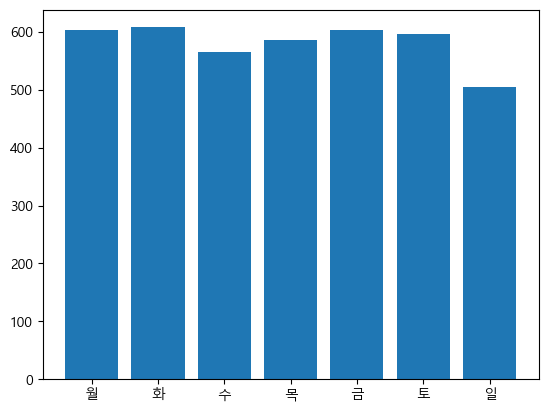

In [14]:
plt.bar(x,y)

- 선생님의 방법

<BarContainer object of 7 artists>

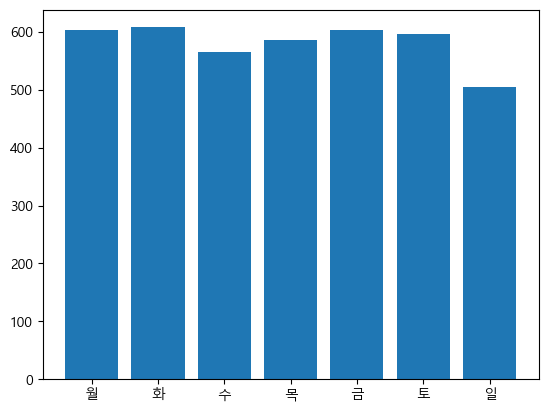

In [15]:
data2 = data["요일"].value_counts()
day = data2[['월','화','수','목','금','토','일']]
x = day.index
y = day.values
plt.bar(x,y)

- 굳이 groupby 사용할 필요 없이 요일별 value_counts()를 하면 됨..

- pandas내의 plot을 그리기

<Axes: xlabel='요일'>

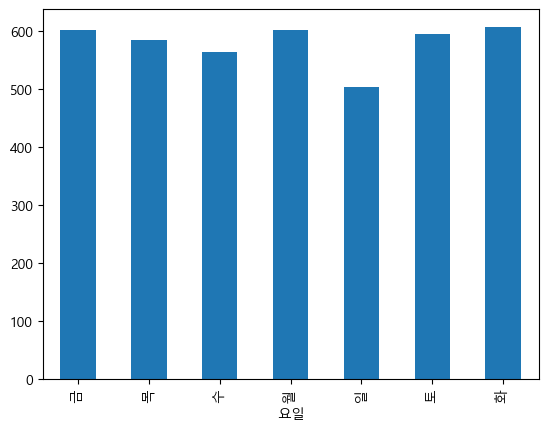

In [16]:
data.groupby(['요일'])['발생년'].count().plot(kind = 'bar')

In [17]:
data_day = data.groupby(['요일'])['발생년'].count()
data_day = data_day.loc[['월','화','수','목','금','토','일']]
data_day

요일
월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 발생년, dtype: int64

- plt.bar을 이용해서 그리기

In [18]:
print(type(plt.ylim))

<class 'function'>


<BarContainer object of 7 artists>

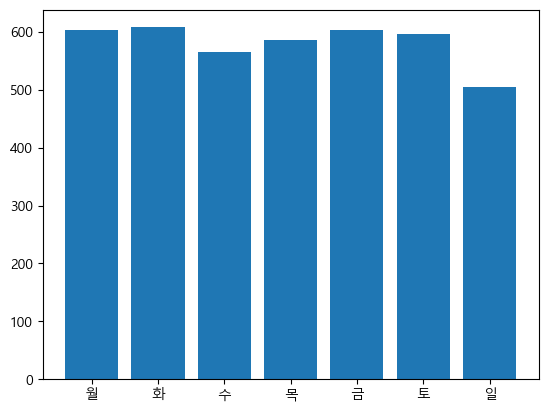

In [19]:
plt.bar(data_day.index,data_day)

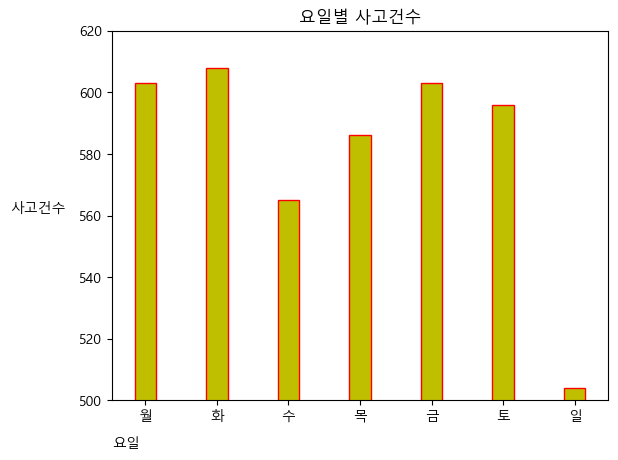

In [42]:
plt.bar(data_day.index,data_day,
       color = 'y',
       width = 0.3,
       edgecolor = 'r') # bar의 두께
plt.xlabel('요일',loc = 'left',labelpad = 10) #x축 이름
plt.ylabel('사고건수',labelpad = 30,rotation=0)
plt.title('요일별 사고건수')
plt.ylim(500,620);


### 사고 유형 충 차대차 사건 중 죽거나 다친 사람이 많은 발생지시도를 알아보고 시각화해보자

In [46]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

- 각 발생지시도 별 '차대차' 사건 수 > 각 사건의 사상자 수는 포함되지 않음

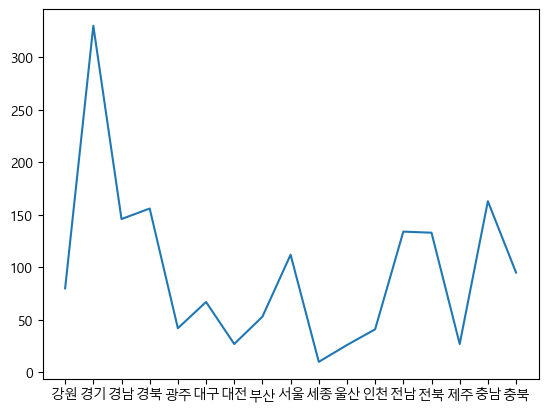

In [78]:
plt.plot(car['발생지시도'].value_counts().sort_index())

In [58]:
data['사고유형_대분류'].value_counts().sort_index()

사고유형_대분류
차대사람     1601
차대차      1642
차량단독      821
철길건널목       1
Name: count, dtype: int64

In [62]:
car = data[data['사고유형_대분류'] == "차대차"]

- 각 발생지시도별, 사상자 수

In [70]:
data1 = car[['발생지시도','사상자수']]

In [82]:
data1.value_counts() # 발생지시도 별로 사상자수

발생지시도  사상자수
경기     1       164
경북     1        93
경남     1        93
충남     1        83
경기     2        81
              ... 
경북     10        1
       8         1
서울     6         1
경남     19        1
충북     22        1
Name: count, Length: 123, dtype: int64

In [110]:
result = data1.groupby('발생지시도').sum() # 각 발생지 시도 별의 사상자 수의 합계

- 각 발생지시도의 차대차 사건중 사상자수 총합 그래프 > 즉 각 발생지시도 별로 사상자수를 모두 더한것 (막대그래프가 훨씬 좋은 판단임) > 선그래프는 시계열데이터에 훨씬 적합함

In [113]:
result['사상자수'].values

array([214, 824, 248, 287,  87, 115,  61, 107, 197,  17,  73,  66, 298,
       244,  50, 351, 261])

In [138]:
x = result.index
y = result['사상자수'].values

In [139]:
x

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='발생지시도')

In [140]:
y

array([214, 824, 248, 287,  87, 115,  61, 107, 197,  17,  73,  66, 298,
       244,  50, 351, 261])

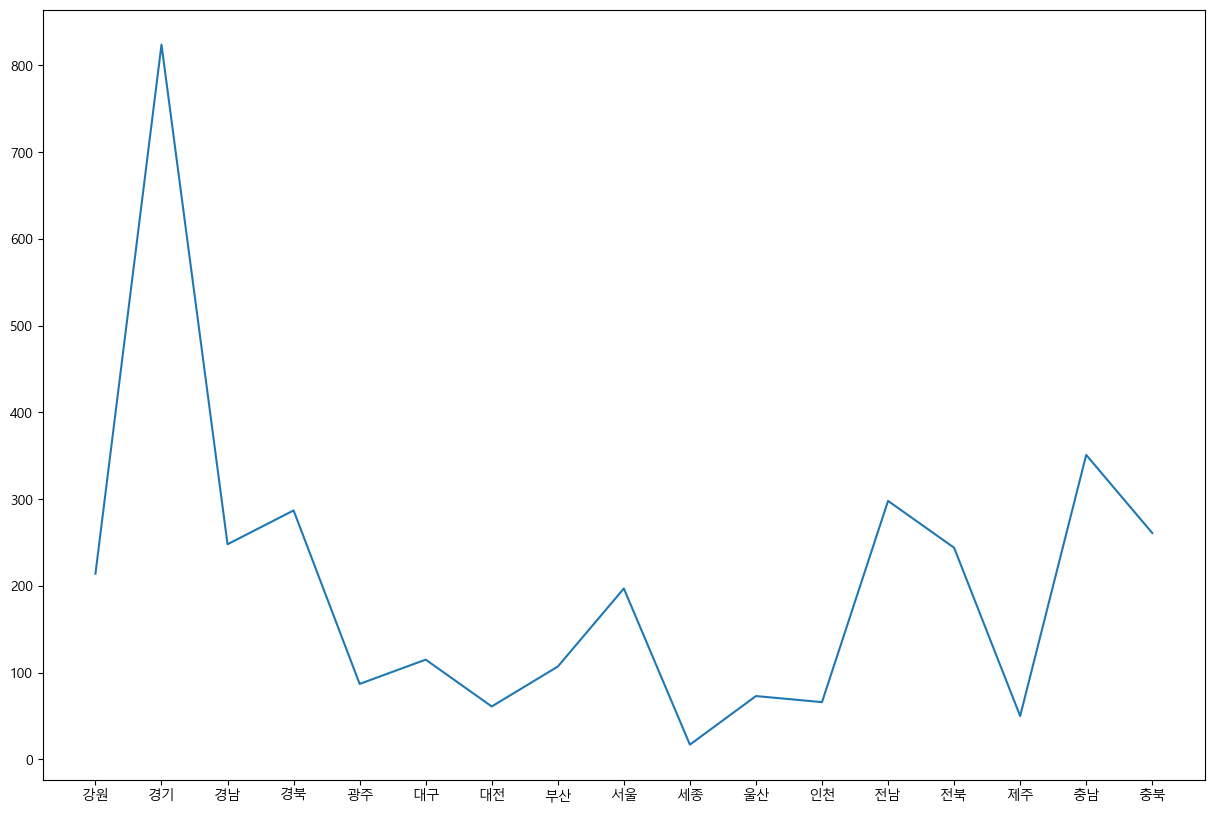

In [141]:
plt.figure(figsize = (15,10))
plt.plot(result)

<BarContainer object of 17 artists>

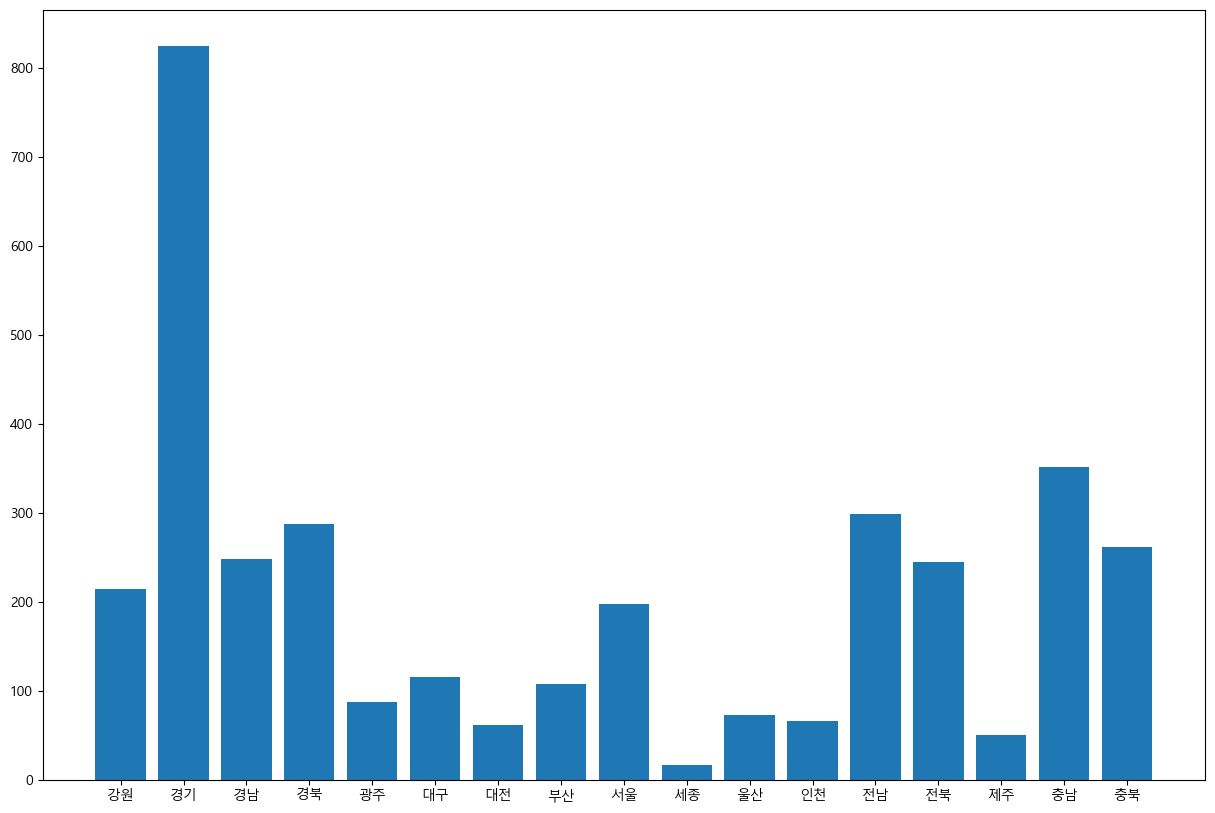

In [144]:
plt.figure(figsize = (15,10))
plt.bar(x,y)

프로세스
1. 우선 차대차에 해당하는 데이터를 먼저 boolean 인덱싱을 통해서 가져오기
2. 차대차에 해당하는 데이터에서 '발생지시도','사상자수'를 가져옴.
3. 위 데이터에서 groupby를 통해 '발생지시도' 기준으로 사상자수를 카운팅한다

In [117]:
data1 = car[['발생지시도','사상자수']]

In [124]:
data1

,발생지시도,사상자수
0,전남,2
2,충남,2
8,제주,3
9,충남,7
17,경북,2
...,...,...
4050,경남,1
4055,광주,6
4058,경북,1
4060,경남,4


In [128]:
result1 = data1.groupby('발생지시도')['사상자수'].sum() # 각 발생지 시도 별의 사상자 수의 합계 groupby 방식을 바꿔서 

- 각 발생지시도의 차대차 사건중 사상자수 총합 그래프 > 즉 각 발생지시도 별로 사상자수를 모두 더한것 (막대그래프가 훨씬 좋은 판단임) > 선그래프는 시계열데이터에 훨씬 적합함

In [129]:
result1.values

array([214, 824, 248, 287,  87, 115,  61, 107, 197,  17,  73,  66, 298,
       244,  50, 351, 261])

In [130]:
x = result1.index
y = result1.values

In [131]:
x

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='발생지시도')

In [132]:
y

array([214, 824, 248, 287,  87, 115,  61, 107, 197,  17,  73,  66, 298,
       244,  50, 351, 261])

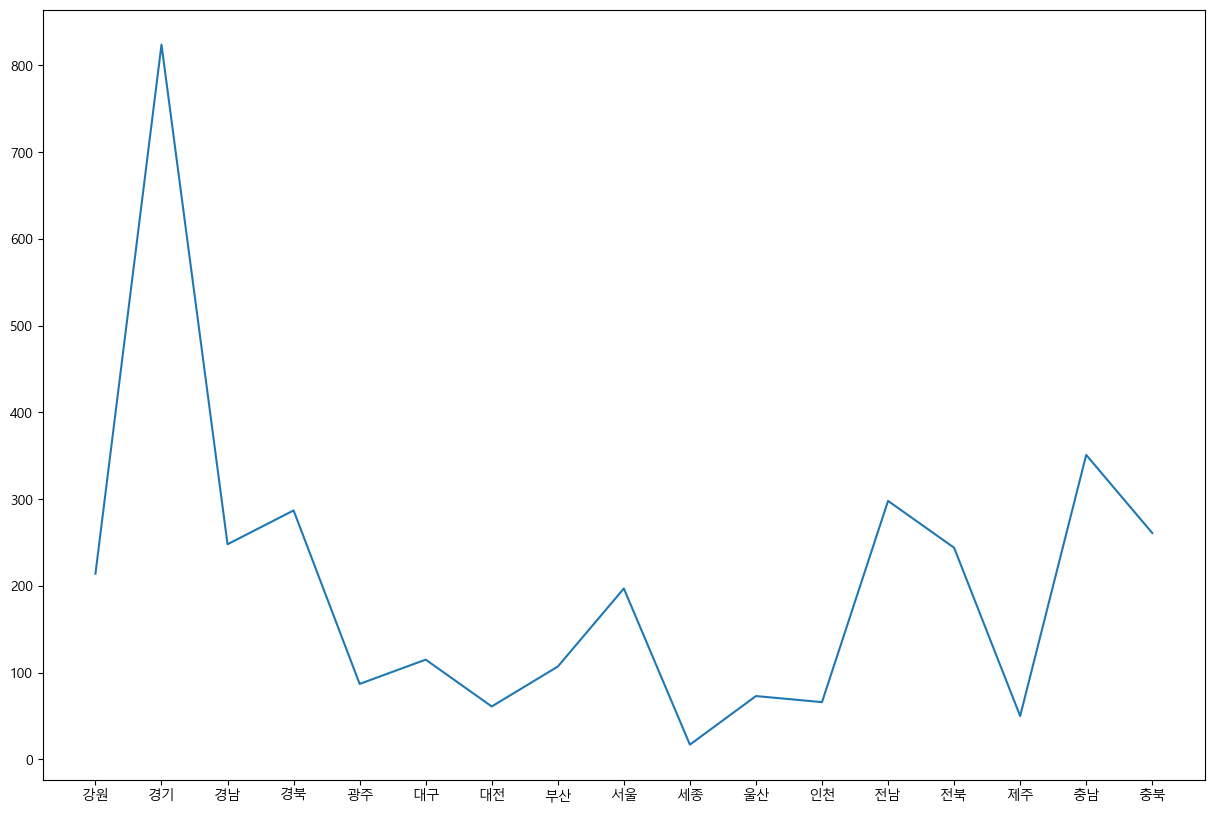

In [133]:
plt.figure(figsize = (15,10))
plt.plot(result)

<BarContainer object of 17 artists>

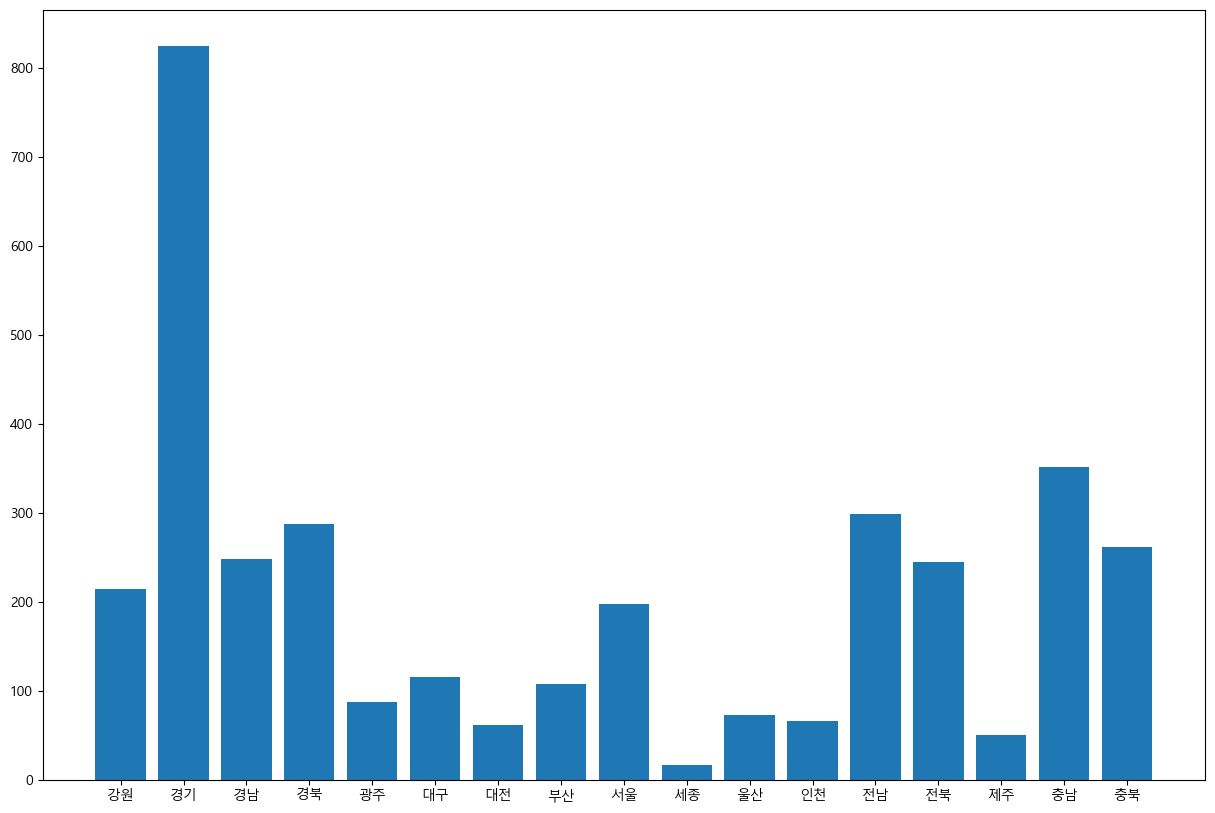

In [136]:
plt.figure(figsize = (15,10))
plt.bar(x,y)

- matplotlib에서는 막대그래프를 그릴때, 1차원으로 동일해야함 (Series형태여야함)

<Axes: xlabel='발생지시도'>

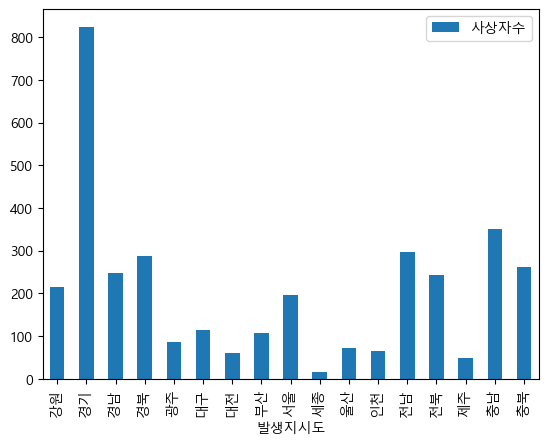

In [137]:
result.plot(kind = 'bar')

- 판다스의 plot 함수는 차원에 관계없이 그냥 그려짐